<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

In [3]:
Y = np.array([1, 3.5, 4, 8, 12])
Y_hat = np.array([1, 3, 5, 7, 9])

print(f'Error: {Y_hat - Y}')

SE = (Y_hat - Y) ** 2
print(f'Squared Error: {SE}')
print(f'Sum Squared Error: {np.sum(SE):0.4f}')

Error: [ 0.  -0.5  1.  -1.  -3. ]
Squared Error: [0.   0.25 1.   1.   9.  ]
Sum Squared Error: 11.2500


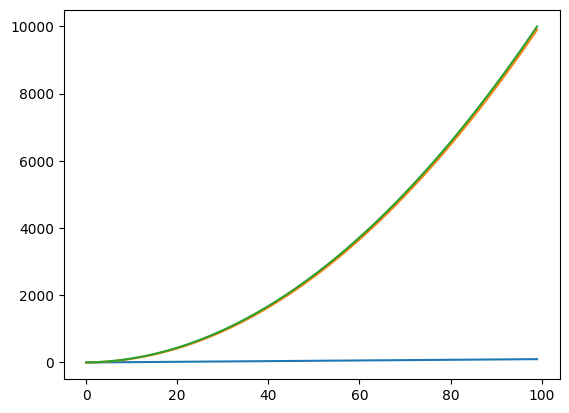

In [4]:
X1 = np.arange(100)
X2 = np.array([i ** 2 for i in range(100)]) + X1

Y = X1 + X2

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(Y, label='Y')
plt.show()

In [5]:
X = sm.add_constant(np.column_stack((X1, X2)))
results = regression.linear_model.OLS(Y, X).fit()

print(f'Beta_0: {results.params[0]}')
print(f'Beta_1: {results.params[1]}')
print(f'Beta_2: {results.params[2]}')

Beta_0: 2.5579538487363607e-13
Beta_1: 1.0000000000004086
Beta_2: 0.9999999999999942


In [9]:
import yfinance as yf

start = '2014-01-01'
end = '2015-01-01'

asset1 = yf.download('DAL', start=start, end=end)['Close']
asset2 = yf.download('FI', start=start, end=end)['Close']
benchmark = yf.download('SPY', start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
print('SLR beta of asset2:', slr.params[1])

SLR beta of asset2: 1.670782544369041


In [12]:
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
prediction.name = 'Prediction'

print('MLR beta of asset2:', mlr.params[1], '\nMLR beta of S&P 500:', mlr.params[2])

MLR beta of asset2: 0.37491511414449313 
MLR beta of S&P 500: 0.4199780066717874


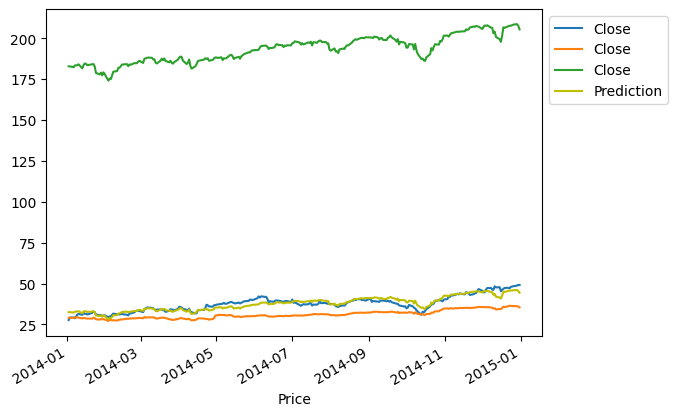

In [13]:
asset1.plot()
asset2.plot()
benchmark.plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2);

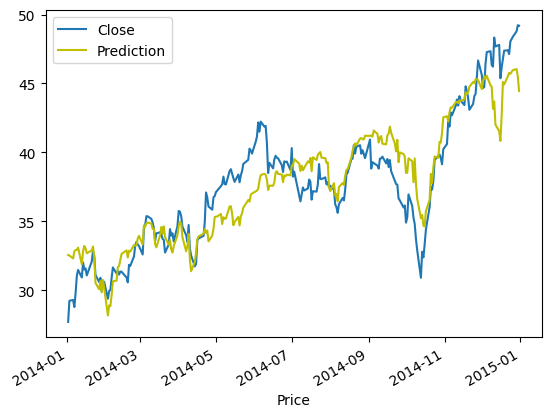

In [14]:
asset1.plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend();

In [15]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     534.3
Date:                Fri, 10 May 2024   Prob (F-statistic):           8.24e-91
Time:                        16:21:55   Log-Likelihood:                -536.36
No. Observations:                 252   AIC:                             1079.
Df Residuals:                     249   BIC:                             1089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.1756      4.343    -12.703      0.000     -63.730     -46.621
x1             0.3749      0.138      2.719      0.007       0.103       0.646
x2             0.4200      0.041     10.208      0.000       0.339       0.501
==============================================================================
Omnibus:                        4.254   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.267
Skew:                           0.316   Prob(JB):                        0.118
Kurtosis:                       2.923   Cond. No.                     6.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Selection

In [16]:
X1 = np.arange(100)
X2 = [i ** 2 for i in range(100)] - X1
X3 = [np.log(i) for i in range(1, 101)] + X2
X4 = 5 * X1
Y = 2 * X1 + 0.5 * X2 + 10 * X3 + X4

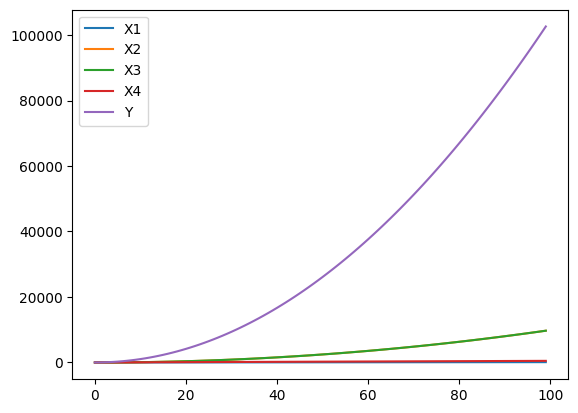

In [17]:
plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(X3, label='X3')
plt.plot(X4, label='X4')
plt.plot(Y, label='Y')
plt.legend()
plt.show()

In [18]:
results = regression.linear_model.OLS(Y, sm.add_constant(np.column_stack((X1, X2, X3, X4)))).fit()
print(f'Beta0: {results.params[0]}')
print(f'Beta1: {results.params[1]}')
print(f'Beta2: {results.params[2]}')
print(f'Beta3: {results.params[3]}')
print(f'Beta4: {results.params[4]}')

Beta0: -2.4556356947869062e-11
Beta1: 0.26923076923053646
Beta2: 0.4999999999886313
Beta3: 10.000000000009095
Beta4: 1.3461538461538538


In [20]:
columns = np.column_stack((X1, X2, X3, X4))
data = pd.DataFrame(columns, columns=['X1', 'X2', 'X3', 'X4'])
response = pd.Series(Y, name='Y')

In [21]:
data.head(10)

,X1,X2,X3,X4
0,0.0,0.0,0.000000,0.0
1,1.0,0.0,0.693147,5.0
2,2.0,2.0,3.098612,10.0
3,3.0,6.0,7.386294,15.0
4,4.0,12.0,13.609438,20.0
5,5.0,20.0,21.791759,25.0
6,6.0,30.0,31.945910,30.0
7,7.0,42.0,44.079442,35.0
8,8.0,56.0,58.197225,40.0
9,9.0,72.0,74.302585,45.0


In [23]:
def forward_aic(response, data):
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name='Intercept')
    current_score, best_new_score = np.inf, np.inf

    while current_score == best_new_score and len(explanatory) !=0:
        scores_with_elements = []
        count = 0

        for element in explanatory:
            tmp = pd.concat([selected, data[element]], axis=1)
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1

        scores_with_elements.sort(reverse=True)
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]], axis=1)
            current_score = best_new_score
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [24]:
result = forward_aic(Y, data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.260e+27
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        16:36:24   Log-Likelihood:                 1770.9
No. Observations:                 100   AIC:                            -3534.
Df Residuals:                      96   BIC:                            -3523.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.411e-11   3.47e-09      0.013      0.990   -6.85e-09    6.94e-09
X3            10.0000    2.1e-09   4.76e+09      0.000      10.000      10.000
X1             0.2692   6.42e-12   4.19e+10      0.000       0.269       0.269
X2             0.5000    2.1e-09   2.38e+08      0.000       0.500       0.500
X4             1.3462   3.21e-11   4.19e+10      0.000       1.346       1.346
==============================================================================
Omnibus:                       14.005   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.998
Skew:                           0.649   Prob(JB):                      0.00674
Kurtosis:                       2.155   Cond. No.                     5.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""